You are supposed to implement a playground on notebook which will allow the user to acquire results regarding all concepts of joint PDF that we learnt today.

Acquire probability from a Joint PDF (both discrete and continuous)

Conditional Probability - conditional mean - conditional variance

Marginal distribution

Acquire co-variance, correlation


In [2]:
!pip install prob140
!pip install datascience

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datascience import *
from prob140 import *
from scipy.stats import pearsonr, spearmanr
import statistics
import random
%matplotlib inline

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [4]:
def generate_table(col1, col2, columns, sumTitle='Total'):
  m_n = zip(col1, col2)
  df = pd.DataFrame(m_n, columns=columns)
  pdf = df.groupby(columns).size().reset_index(name='count')
  ct = pd.crosstab(pdf[columns[0]], pdf[columns[1]], normalize='all', margins=True, margins_name=sumTitle)
  return ct

def random_dist():
  XY = Table().domain(make_array(2,4,6,8,10), np.arange(1, 10, 3))
  random_array = [random.random() for i in range(len(XY[1]))]
  return XY.probability(random_array)

## Joint PDF (Discrete)

In [5]:
m = np.random.randint(2,10,100)
n = np.random.randint(11,20,100)

<function matplotlib.pyplot.show>

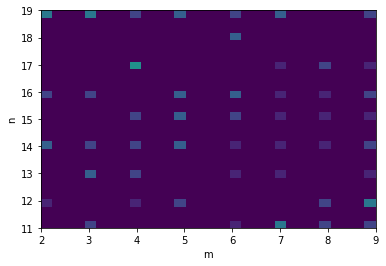

In [6]:
plt.hist2d(m,n,30,vmax=10)
plt.xlabel('m')
plt.ylabel('n')
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

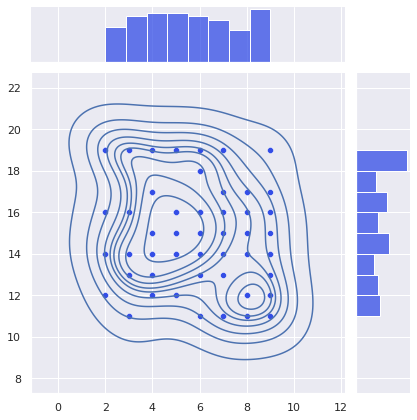

In [7]:
sns.set()
sns.jointplot(m,n,kind='scatter',color=[.2,.3,.9]).plot_joint(sns.kdeplot)
plt.show

In [8]:
generate_table(m, n, ['m', 'n'])

n,11,12,13,14,15,16,17,18,19,Total
m,,,,,,,,,,
2,0.000000,0.020833,0.000000,0.020833,0.000000,0.020833,0.000000,0.000000,0.020833,0.083333
3,0.020833,0.000000,0.020833,0.020833,0.000000,0.020833,0.000000,0.000000,0.020833,0.104167
4,0.000000,0.020833,0.020833,0.020833,0.020833,0.000000,0.020833,0.000000,0.020833,0.125000
5,0.000000,0.020833,0.000000,0.020833,0.020833,0.020833,0.000000,0.000000,0.020833,0.104167
6,0.020833,0.000000,0.020833,0.020833,0.020833,0.020833,0.000000,0.020833,0.020833,0.145833
7,0.020833,0.000000,0.020833,0.020833,0.020833,0.020833,0.020833,0.000000,0.020833,0.145833
8,0.020833,0.020833,0.000000,0.020833,0.020833,0.020833,0.020833,0.000000,0.000000,0.125000
9,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.000000,0.020833,0.166667
Total,0.104167,0.104167,0.104167,0.166667,0.125000,0.145833,0.083333,0.020833,0.145833,1.000000


## Joint PDF (Continuous)

In [9]:
a = 100

x = np.random.randn(a)
y = np.random.randn(a)**2


<function matplotlib.pyplot.show>

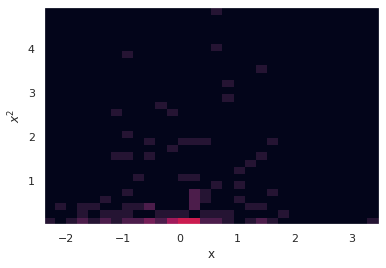

In [10]:
plt.hist2d(x,y,30,vmax=10)
plt.xlabel('x')
plt.ylabel('$x^2$')
plt.show

Seperate histogram for each variable
Large concentration of values for x^2 towards zero

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

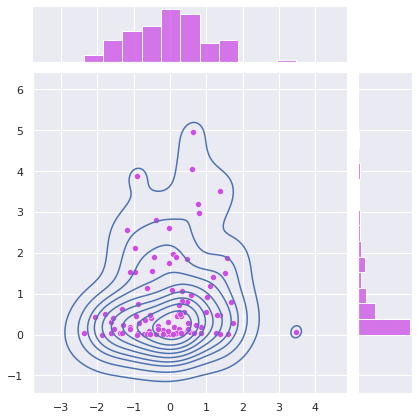

In [11]:
sns.set()
sns.jointplot(x,y,kind='scatter',color=[.8,.3,.9]).plot_joint(sns.kdeplot)
plt.show

Each dot is a datapoint on the x and y axis
The distribution on the side and top are the marginal distributions over the two dimensions
On top is the distribution over x, ignoring the y axis
The distribution on the side is over y, ignoring x
Density estimation on top



In [12]:
generate_table(x, y, ['x', 'y'])

y,0.00011868464689512276,0.001104165751636885,0.0020568877971466936,0.0029315638786498186,0.004834983280485902,0.005787296443557329,0.006821252225958186,0.006936086721854905,0.00849277353955974,0.010157455624640656,0.01421268532258777,0.01580230540112959,0.018621192289919278,0.01881908969136606,0.02082884965321777,0.020861287685307376,0.021470328216459906,0.027073170610873214,0.027620690834646165,0.03428864350305096,0.03526897453624407,0.03663426860173326,0.03777118305243996,0.0385617103343098,0.04198933547352441,0.04298485454662652,0.04395771686755882,0.0449165961471897,0.046637179390364894,0.04722108071995984,0.06613083333251367,0.0690108235621244,0.0782153335673894,0.08629845215280711,0.08775680397407522,0.11099873843724237,0.12778787266766511,0.1282022936375211,0.12827176900427323,0.14702843682518812,...,0.48641169531801287,0.4961238012486904,0.5014051331390167,0.54171594169188,0.5526602426157513,0.5630801324669619,0.6252210594034211,0.7204197269058454,0.7424865467011086,0.7927802126310441,0.7981204546614484,0.8225912522473677,0.9308374808688228,0.9708586470250317,1.0628683517479507,1.0992627126833014,1.1366222488986628,1.191773888807264,1.4138512852034486,1.4971356217706693,1.5324463449754562,1.5388114353596418,1.5630681821029941,1.7411567712101097,1.8528791764278332,1.8623425289629658,1.894012841726367,1.9105706506400533,1.9613112506935029,2.1312400971843446,2.554810873910039,2.600027531687202,2.802060128848451,2.9705454482970746,3.1942432683644966,3.5126577845191185,3.884535662751,4.058510144347062,4.965294958987002,Total
x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-2.3702527917248357,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
-2.0657278783331225,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
-1.8583401757589955,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
-1.7775876896808604,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
-1.636431286774866,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Here in the above Matrix table we are showing the distribution of x and y values in the continous joint pdf

## Marginal Distribution

The probability distribution of the variables contained in a subset of a collection of random variables is called the marginal distribution of the subset. 

It calculates the probability of various values of the variables in the subset without taking into account the other variables' values. 

A conditional distribution, on the other hand, delivers probabilities based on the values of the other variables.

Example: Consider a rolling of two dice as an example of marginal distribution there is a 1/36 changes of getting a number in that dice roll it does not depend on any other variable. Here we are only interested in one of the random variable

In [13]:
MD = random_dist()
MD.both_marginals()

/usr/local/lib/python3.7/dist-packages/prob140/single_variable.py:350: UserWarning: .probability() is deprecated - please use .probabilities()
  warnings.warn('.probability() is deprecated - please use .probabilities()')
/usr/local/lib/python3.7/dist-packages/prob140/single_variable.py:345: UserWarning: Probabilities sum to 5.901246851422405
  warnings.warn('Probabilities sum to {0}'.format(sum(values)))
/usr/local/lib/python3.7/dist-packages/prob140/multi_variable.py:396: UserWarning: Your probabilities sum to 5.901246851422405
  warnings.warn('Your probabilities sum to {0}'.format(total))


,X=2,X=4,X=6,X=8,X=10,Sum: Marginal of Y
Y=7,0.004928,0.319423,0.486929,0.249351,0.188382,1.249013
Y=4,0.222513,0.030490,0.546516,0.861547,0.214742,1.875808
Y=1,0.259115,0.510588,0.679063,0.673367,0.654293,2.776425
Sum: Marginal of X,0.486556,0.860501,1.712508,1.784265,1.057418,5.901247


In [14]:
MD.marginal('X')

,X=2,X=4,X=6,X=8,X=10
Y=7,0.004928,0.319423,0.486929,0.249351,0.188382
Y=4,0.222513,0.030490,0.546516,0.861547,0.214742
Y=1,0.259115,0.510588,0.679063,0.673367,0.654293
Sum: Marginal of X,0.486556,0.860501,1.712508,1.784265,1.057418


In [15]:
MD.marginal('Y')

,X=2,X=4,X=6,X=8,X=10,Sum: Marginal of Y
Y=7,0.004928,0.319423,0.486929,0.249351,0.188382,1.249013
Y=4,0.222513,0.030490,0.546516,0.861547,0.214742,1.875808
Y=1,0.259115,0.510588,0.679063,0.673367,0.654293,2.776425


The relationship between two numeric variables can be studied using a marginal plot. Their relationship is depicted in the central graph. A scatterplot, a hexbin plot, a 2D histogram, or a 2D density plot are the most common types. The marginal charts, which are normally on the top and right, use a histogram or density plot to represent the distribution of two variables.

Here we have some marginal distribution charts different from the one plotted above

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


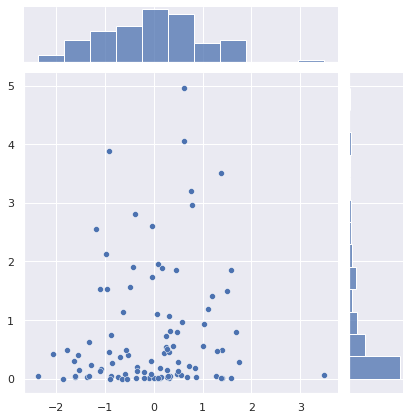

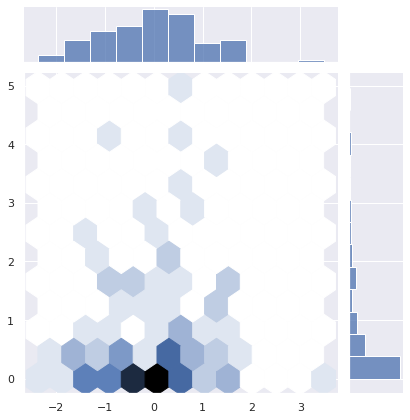

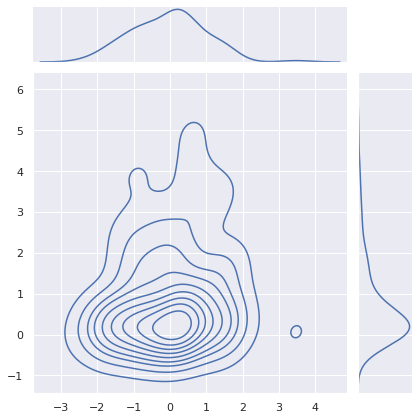

In [16]:
sns.jointplot(x,y, kind='scatter')
sns.jointplot(x,y, kind='hex')
sns.jointplot(x,y, kind='kde')

## Conditional Probability

Conditional probability is the probability of an event given another event.

Consider the two events: A and B. P(A|B) is the conditional probability of A given B, and it can be read as the probability of A in the case where we know B is true. It is defined in simpler terms as P(A|B)=P(A∩B)/P(B), meaning the probabilities A and B are both true, divided by the probability B is true.

In the example below we are calculating bus arrival status in different weather conditions

In [17]:
from itertools import repeat

weather = ['Sunny', 'Cloudy', 'Rainy', 'Snowy']
bus = ['on_time', 'delayed']

weather_bus = zip(weather, repeat(bus)) # zip(weather, cycle(bus)) if len(weather) > len(bus) else zip(cycle(weath), bus)
df = pd.DataFrame(weather_bus, columns=['weather', 'bus'])
pdf = df.explode('bus')
pdf['visits'] = np.random.randint(10, 50, len(pdf))
pd.crosstab(pdf['weather'], pdf['bus'], pdf['visits'], aggfunc='sum', margins=True, margins_name='Total')

bus,delayed,on_time,Total
weather,,,
Cloudy,30,15,45
Rainy,44,47,91
Snowy,13,47,60
Sunny,20,10,30
Total,107,119,226


In the table below we are showing the probability of these events happening and their dependency on one another. As you can see the sum of the probability is equal to 1.

In [18]:
pd.crosstab(pdf['weather'], pdf['bus'], pdf['visits'], normalize='all', aggfunc='sum', margins=True, margins_name='Total')

bus,delayed,on_time,Total
weather,,,
Cloudy,0.132743,0.066372,0.199115
Rainy,0.194690,0.207965,0.402655
Snowy,0.057522,0.207965,0.265487
Sunny,0.088496,0.044248,0.132743
Total,0.473451,0.526549,1.000000


Consider the two events: Weather and Bus. P(delayed|snowy) is the conditional probability of Bus given Weather, and it can be read as the probability of bus arrival in the case where we know weather is snowy. It is defined in simpler terms as P(delayed|snowy)=P(delayed ∩ snowy)/P(snowy), meaning the probabilities Bus and Weather are both true, divided by the probability of Weather is true.

Calculations

P(delayed) = 153 / 267 = 0.57

P(delayed | snowy) = P(delayed | snowy) / P(snowy)

P(delayed | snowy) = 34/48

P(delayed | snowy) = 0.708

### Continous Random Variables

Assume that X and Y are continuous random variables with the joint probability density function f(x,y) and the marginal probability density functions fx(x), fy(y), and, respectively. Given X = x, the conditional probability density function of Y is defined as follows:

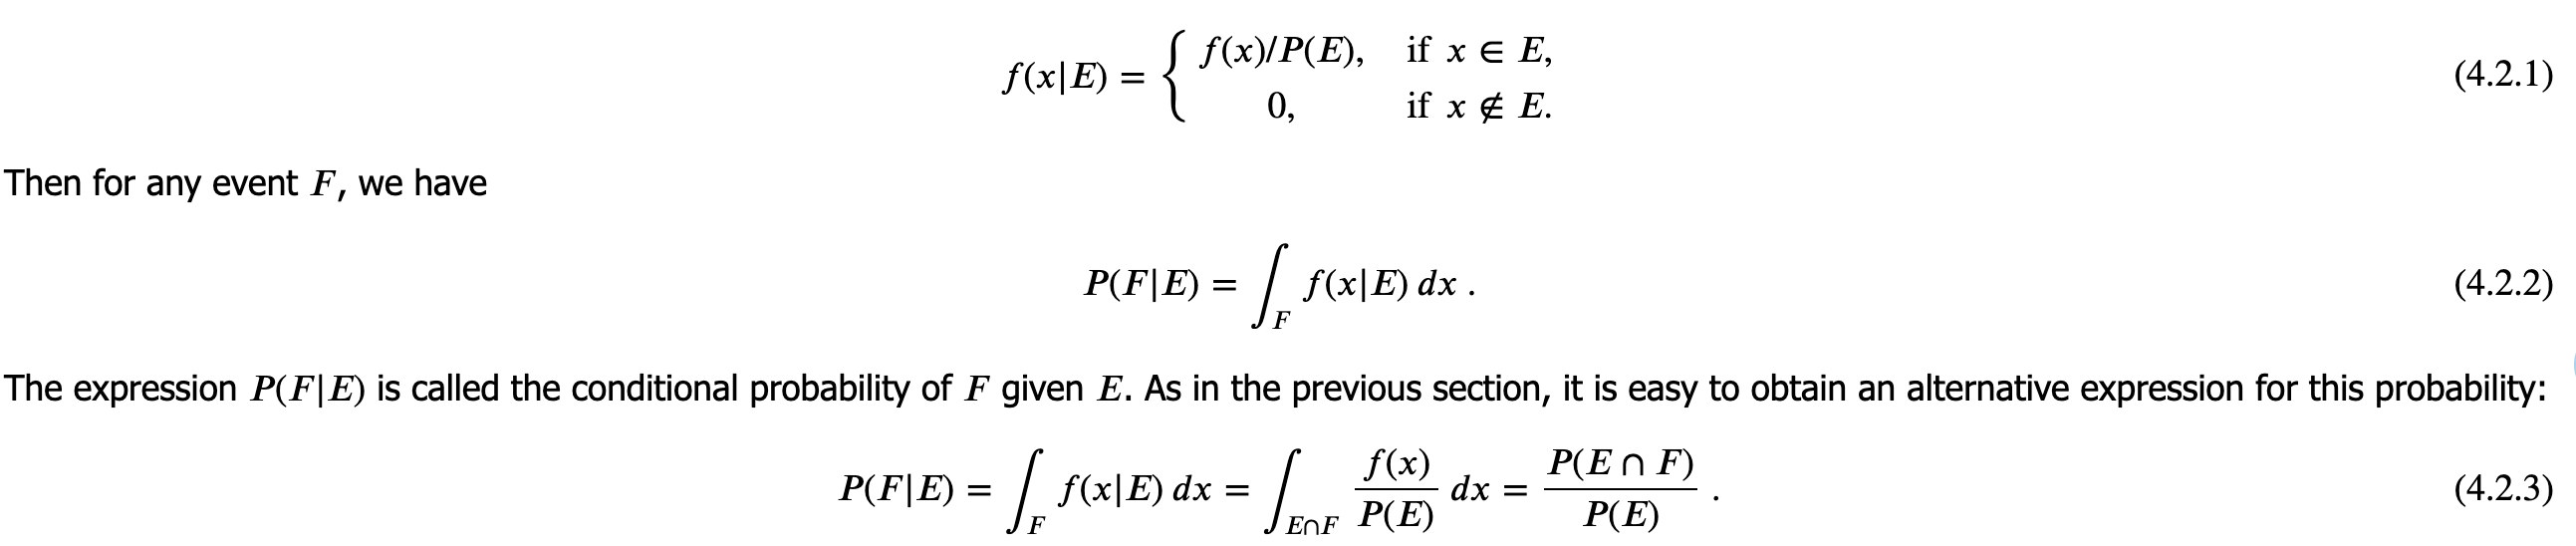

Source: [stats.libretexts.org](https://stats.libretexts.org/Bookshelves/Probability_Theory/Book%3A_Introductory_Probability_(Grinstead_and_Snell)/04%3A_Conditional_Probability/4.02%3A_Continuous_Conditional_Probability)

### Conditional Distribution

In [19]:
RV_CD = random_dist()
RV_CD.conditional_dist('X')

/usr/local/lib/python3.7/dist-packages/prob140/single_variable.py:350: UserWarning: .probability() is deprecated - please use .probabilities()
  warnings.warn('.probability() is deprecated - please use .probabilities()')
/usr/local/lib/python3.7/dist-packages/prob140/single_variable.py:345: UserWarning: Probabilities sum to 5.752950611386471
  warnings.warn('Probabilities sum to {0}'.format(sum(values)))
/usr/local/lib/python3.7/dist-packages/prob140/multi_variable.py:396: UserWarning: Your probabilities sum to 5.752950611386471
  warnings.warn('Your probabilities sum to {0}'.format(total))


,X=2,X=4,X=6,X=8,X=10,Sum
Dist. of X | Y=7,0.466492,0.021026,0.287264,0.101046,0.124172,1.0
Dist. of X | Y=4,0.196535,0.134841,0.428745,0.036825,0.203053,1.0
Dist. of X | Y=1,0.368425,0.000647,0.353352,0.027614,0.249961,1.0
Marginal of X,0.334357,0.055723,0.361516,0.052556,0.195847,1.0


## Conditional Mean & Conditional Variance

In [20]:
age = np.random.randint(20,30,200).tolist()
height = np.random.randint(48,60,20).tolist()
age_height = zip(age, height)
df = pd.DataFrame(age_height, columns=['age', 'height'])
mean_conditional = [df.groupby('age') for col_name in df.columns]
variance_conditional = [df.groupby('height') for col_name in df.columns]

### Conditional Mean & Conditional Variance

In [21]:
mean = [cond.mean() for cond in mean_conditional]
print(mean)

[        height
age           
20   59.000000
21   56.000000
22   52.000000
23   51.750000
24   57.000000
25   52.666667
26   54.000000
27   50.000000
28   55.000000
29   51.000000,         height
age           
20   59.000000
21   56.000000
22   52.000000
23   51.750000
24   57.000000
25   52.666667
26   54.000000
27   50.000000
28   55.000000
29   51.000000]


In [22]:
var = [cond.var() for cond in variance_conditional]
print(var)

[              age
height           
48            NaN
49       9.000000
50       6.666667
51            NaN
52            NaN
53            NaN
54            NaN
56       4.333333
57       7.000000
59      18.000000,               age
height           
48            NaN
49       9.000000
50       6.666667
51            NaN
52            NaN
53            NaN
54            NaN
56       4.333333
57       7.000000
59      18.000000]


### Another Example of calculating Conditional Mean & Conditional Variance

In [23]:
RV_CM = random_dist()
mean = RV_CM.conditional_dist('X','Y').mean
print('\n')
print(mean)
print('\n')



<bound method DataFrame.mean of                        X=2       X=4       X=6       X=8      X=10  Sum
Dist. of X | Y=7  0.164568  0.244790  0.167038  0.245013  0.178591  1.0
Dist. of X | Y=4  0.253281  0.087527  0.203205  0.258797  0.197189  1.0
Dist. of X | Y=1  0.091101  0.121994  0.438193  0.041551  0.307161  1.0
Marginal of X     0.182780  0.157931  0.239406  0.206422  0.213461  1.0>




/usr/local/lib/python3.7/dist-packages/prob140/single_variable.py:350: UserWarning: .probability() is deprecated - please use .probabilities()
  warnings.warn('.probability() is deprecated - please use .probabilities()')
/usr/local/lib/python3.7/dist-packages/prob140/single_variable.py:345: UserWarning: Probabilities sum to 9.967253972869297
  warnings.warn('Probabilities sum to {0}'.format(sum(values)))
/usr/local/lib/python3.7/dist-packages/prob140/multi_variable.py:396: UserWarning: Your probabilities sum to 9.967253972869297
  warnings.warn('Your probabilities sum to {0}'.format(total))


### Conditional Variance

When a random variable Y is given another random variable X, its conditional variance is

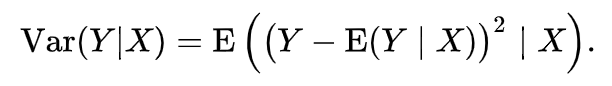

If we use E(Y|X) to "predict" Y, the conditional variance shows how much variance is left. As is customary, E(Y|X) denotes the conditional expectation of Y given X, which is a random variable in and of itself (a function of X, determined up to probability one). Var(Y|X) is a random variable as a result of this (and is a function of X).

In [24]:
RV_CV = random_dist()
variance = [statistics.variance(RV_CV.values[i]) for i in range(len(RV_CV.values))]
print('\n')
print(variance)
print('\n')



[0.09183638769492043, 0.09454134532387766, 0.07317011641850858]




/usr/local/lib/python3.7/dist-packages/prob140/single_variable.py:350: UserWarning: .probability() is deprecated - please use .probabilities()
  warnings.warn('.probability() is deprecated - please use .probabilities()')
/usr/local/lib/python3.7/dist-packages/prob140/single_variable.py:345: UserWarning: Probabilities sum to 8.176644463045145
  warnings.warn('Probabilities sum to {0}'.format(sum(values)))
/usr/local/lib/python3.7/dist-packages/prob140/multi_variable.py:396: UserWarning: Your probabilities sum to 8.176644463045145
  warnings.warn('Your probabilities sum to {0}'.format(total))


## Covariance

The directional link between the returns of two assets is measured by covariance. 

A positive covariance indicates that the two variables are moving together, whereas a negative covariance indicates that they move in opposite directions. 

Covariance is calculated by examining standard deviations or multiplying the correlation between the two variables by each variable's standard deviation.

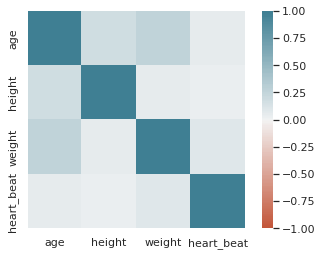

In [25]:
age = np.random.randint(20,30,200).tolist()
height = np.random.randint(48,60,20).tolist()
weight = np.random.randint(50,90,200).tolist()
heart_beat = np.random.randint(90,160,200).tolist()

vitals = zip(age, height, weight, heart_beat)
vdf = pd.DataFrame(vitals, columns=['age', 'height', 'weight', 'heart_beat'])

ax = sns.heatmap(vdf.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
# ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels());

In [26]:
RV_CoV = random_dist()
covariance = np.cov(RV_CoV)
print('\n')
print(covariance)
print('\n')



[[ 0.0511893  -0.03790147  0.02054447]
 [-0.03790147  0.0854426  -0.03893191]
 [ 0.02054447 -0.03893191  0.02855065]]




/usr/local/lib/python3.7/dist-packages/prob140/single_variable.py:350: UserWarning: .probability() is deprecated - please use .probabilities()
  warnings.warn('.probability() is deprecated - please use .probabilities()')
/usr/local/lib/python3.7/dist-packages/prob140/single_variable.py:345: UserWarning: Probabilities sum to 7.166540304477894
  warnings.warn('Probabilities sum to {0}'.format(sum(values)))
/usr/local/lib/python3.7/dist-packages/prob140/multi_variable.py:396: UserWarning: Your probabilities sum to 7.166540304477894
  warnings.warn('Your probabilities sum to {0}'.format(total))


## Correlation

A nonlinear relationship may exist between two variables, with the link becoming stronger or weaker as the variables' distributions change.

Furthermore, the non-Gaussian distribution of the two variables under consideration may exist.

The Spearman's correlation coefficient can be used to summarise the strength of the relationship between the two data samples in this example. If the variables have a linear relationship, you can apply this relationship test, but it will have significantly less strength (e.g. may result in lower coefficient scores).

For perfectly negatively correlated variables and perfectly positively correlated variables, the scores are between -1 and 1, as with the Pearson correlation coefficient.

These statistics are generated from the relative rank of values on each sample, rather than utilising covariance and standard deviations on the samples themselves. This is a frequent method in non-parametric statistics, such as statistical approaches that do not assume a Gaussian data distribution.

[132.48690727  87.76487173  89.43656495  78.54062756 117.30815259
  53.96922606 134.89623528  84.77586198 106.38078192  95.01259249
 129.24215874  58.79718581  93.55165592  92.31891291 122.67538885
  78.00217465  96.55143585  82.44283164 100.84427493 111.65630427
  77.98761646 122.8944742  118.03181441 110.04988678 118.01711899
  86.32544282  97.54219549  81.28461131  94.64223841 110.60710933
  86.16678497  92.06492946  86.256546    83.09588717  86.57507738
  99.74670802  77.65379303 104.68831396 133.19604354 114.84088321
  96.16328895  82.24742072  85.05683412 133.84909202 101.0161551
  87.26008707 103.81830969 142.00510273 102.40317905 112.34406219
 106.0034064   92.95500307  77.14963604  93.01314555  95.82211533
 111.73246382 116.77966828 118.62204163 105.71174651 117.70282329
  84.91204118 125.0573631  110.25859641  94.0381433  109.77036293
  98.48856574 122.63258775 130.39633633 143.71150813  72.07007329
  71.11772389  89.91068274 103.20074139 117.52337842 106.31269894
  59.555975

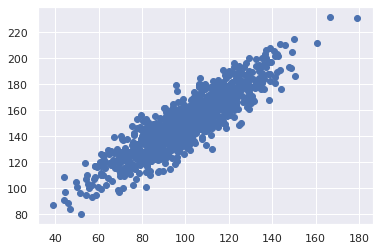

In [27]:
np.random.seed(1)
data1 = 20 * np.random.randn(1000) + 100
data2 = data1 + (10 * np.random.randn(1000) + 50)
print(data1, data2)

print('\n\n')
print('Correlation :: ', pearsonr(data1.tolist(), data2.tolist()))
plt.scatter(data1, data2)
plt.show()

